# 利用pytorch的nn工具箱实现LeNet网络

## 定义网络

In [9]:
import torch as t
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable as V

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__() # nn.Module 子类的函数必须在构造函数中执行父类的构造函数
        
        #卷积层
        self.conv1 = nn.Conv2d(1,6,5) # '1'表示输入图片为单通道，‘6’表示输出通道数，‘5’表示卷积核为 5*5
        self.conv2 = nn.Conv2d(6,16,5)
        
        #全连接层 y = wx + b
        self.fc1 = nn.Linear(16 * 5 * 5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        #卷积 -> 激活 -> 池化
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        
        #reshape
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
net = Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

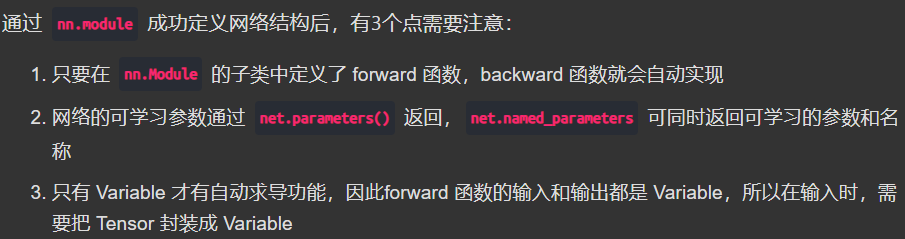

In [10]:
params = list(net.parameters())
print(len(params))
for name, parameters in net.named_parameters():
    print(f'{name}: {parameters.size()}')

10
conv1.weight: torch.Size([6, 1, 5, 5])
conv1.bias: torch.Size([6])
conv2.weight: torch.Size([16, 6, 5, 5])
conv2.bias: torch.Size([16])
fc1.weight: torch.Size([120, 400])
fc1.bias: torch.Size([120])
fc2.weight: torch.Size([84, 120])
fc2.bias: torch.Size([84])
fc3.weight: torch.Size([10, 84])
fc3.bias: torch.Size([10])


In [12]:
input = V(t.randn(1, 1, 32, 32))  # 定义输入
out = net(input)
out.size()  # 输出的形状
net.zero_grad()  # 所有参数的梯度清零
out.backward(V(t.ones(1, 10)))  # 反向传播

## 损失函数